In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# Any results you write to the current directory are saved as output.

/kaggle/input/ace-class-assignment/AMP_TrainSet.csv
/kaggle/input/ace-class-assignment/Test.csv


  # KAYAGA NASHIM MILVAT              2019/HD07/28450U

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
test = pd.read_csv("../input/ace-class-assignment/Test.csv")
test

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
0,4.0,3.704,0.873,73.519,0.987,-4.833,0,0.382,74.556,7.225,1.234
1,4.0,4.444,0.892,62.444,0.931,-0.584,0,0.320,56.056,4.942,1.853
2,2.0,0.000,0.901,47.000,1.039,-5.664,0,0.164,47.000,5.969,1.174
3,4.5,0.000,0.869,69.222,0.982,-5.423,0,2.010,69.222,5.462,1.138
4,-4.0,21.591,1.061,71.682,0.976,-2.002,0,2.758,66.000,5.582,1.453
...,...,...,...,...,...,...,...,...,...,...,...
753,-1.5,16.000,1.100,82.820,0.991,-1.987,0,15.185,85.333,7.053,1.325
754,-1.0,18.182,1.085,73.455,1.027,-0.745,0,16.550,74.667,6.729,1.132
755,-1.0,19.048,1.108,82.190,1.033,-1.789,0,16.112,79.667,6.036,1.219
756,-1.0,7.143,0.955,76.786,1.023,1.141,0,20.630,76.786,5.669,1.111


In [4]:
test.shape

(758, 11)

In [5]:
#read in the data
data = pd.read_csv("../input/ace-class-assignment/AMP_TrainSet.csv")
data.head(5)

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1


## Analyze data by describing

#### This step helped me know which features are in my dataset, are they categorical or numerical.
#### How many rows and columns does the dataset have
#### The data types for the various features
#### Checked whether the dataset has null or missing values

In [6]:
#Check the dimensions to the number of rows and columns
data.shape

(3038, 12)

In [7]:
data.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [8]:
data.dtypes

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
CLASS                   int64
dtype: object

In [9]:
#Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values
data.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


In [10]:
#number of null values in each column
data.isnull().sum()
#since my data has no null values then its good to go

FULL_Charge           0
FULL_AcidicMolPerc    0
FULL_AURR980107       0
FULL_DAYM780201       0
FULL_GEOR030101       0
FULL_OOBM850104       0
NT_EFC195             0
AS_MeanAmphiMoment    0
AS_DAYM780201         0
AS_FUKS010112         0
CT_RACS820104         0
CLASS                 0
dtype: int64

#### needed to know how balanced the class values are

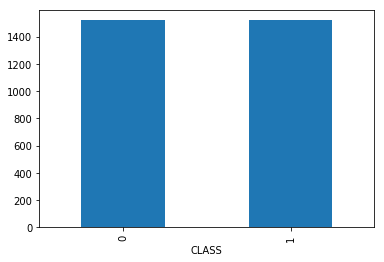

In [11]:

data.groupby('CLASS').size().plot(kind='bar')

#### Its a good idea to review all the pairwise correlations of the attributes in the dataset because some machine learning algorithm like linear and logistic regression can suffer poor performance if there are highly correlated attributes in the dataset

In [12]:
data.corr(method='pearson')

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


####  heat map to show the correlation of the data; plots that show the interactions between multiple variables in the dataset
#### Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. 

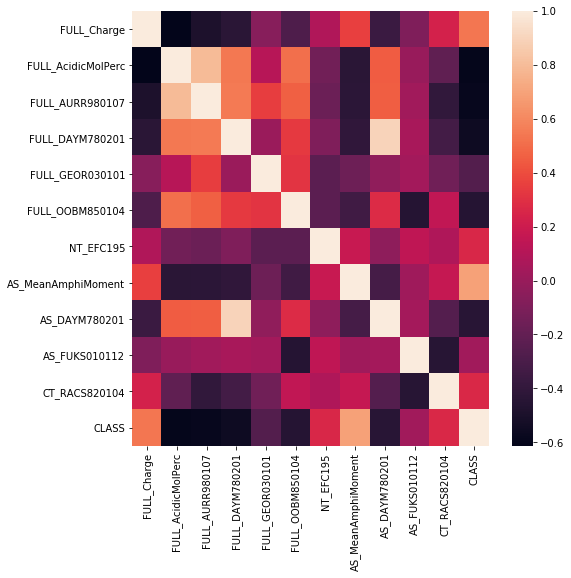

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(method='pearson'))


#### also checked the corelation in regards to the class since am trying to build a ML agorithm for that class

In [14]:

data.corr(method='pearson')['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

#### Most of my variables are positively skewed

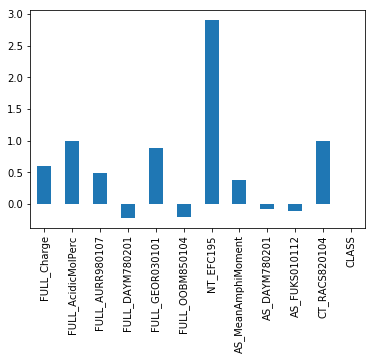

In [15]:
 data.skew().plot(kind='bar')

## understanding data with visualization
#### Data can be visualised in many ways that is univariate plots and multivariate plots             #### Used the Histogram for univariate plot as shown below and the correlation matrix plot as the multivariate plot as shown above

## Histogram
#### This helps to understand each attribute of my dataset independently

## Data pre-processing

<Figure size 1296x1296 with 0 Axes>

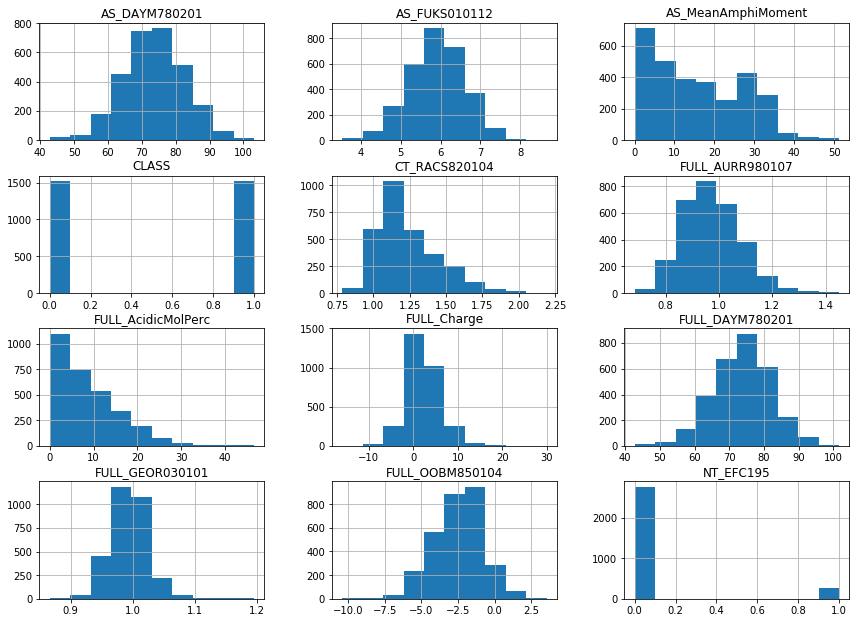

In [16]:
plt.figure(figsize=(18,18))
data.hist()
plt.subplots_adjust(bottom=3, right=2, top=5)
plt.show()

## Standardize data
#### Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1

In [17]:
from sklearn.preprocessing import StandardScaler
array = data.values
#separate array into input and output components
X = array[:,0:11]
Y = array[:,11]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
#set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 7.69712416e-01 -1.12341031e+00 -1.90047029e-01  1.37605977e-01
  -6.06718766e-01 -7.20629784e-01 -3.11684110e-01 -1.33070267e+00
  -2.25681314e-02 -3.60971652e-01 -9.25122883e-01]
 [ 5.07884366e-01 -4.10857567e-01 -3.76275096e-01 -2.43225309e-01
  -1.18128598e+00 -9.24503172e-01  3.20837658e+00 -1.30322672e+00
  -5.92370366e-01  9.02050407e-01  1.03699430e+00]
 [ 9.00626442e-01 -4.10857567e-01 -9.16336490e-01 -8.65106417e-03
  -1.05360437e+00 -4.63244125e-02 -3.11684110e-01 -1.30383154e+00
  -4.59030969e-01 -1.40916462e+00  2.31808537e+00]
 [ 7.69712416e-01 -5.74065761e-01 -7.11485617e-01 -8.70124978e-01
   1.59370848e-01  6.27395116e-01 -3.11684110e-01 -1.30201709e+00
  -7.01486075e-01 -2.30020073e+00  6.98862456e-01]
 [ 1.42428254e+00  2.04070778e-03 -3.66963693e-01 -1.04957427e+00
  -4.79037163e-01  2.00315519e-01 -3.11684110e-01 -1.30184429e+00
  -7.71259861e-02 -1.97723618e+00  1.44656245e+00]]


In [18]:
array = test.values
scaler = StandardScaler().fit(array)
rescaledt = scaler.transform(array)
# summarize transformed data
#set_printoptions(precision=3)
print(rescaledt[0:5,:])

[[ 0.45558229 -0.67113515 -0.90455611 -0.037747   -0.22296129 -1.52565769
  -0.30367585 -1.33755567  0.07989345  2.01150387 -0.07427413]
 [ 0.45558229 -0.57637626 -0.73276977 -1.41794241 -1.95412296  1.13648289
  -0.30367585 -1.34301578 -1.99658599 -1.46614536  2.76572023]
 [-0.01747439 -1.14544186 -0.65139729 -3.34261399  1.38454597 -2.04630698
  -0.30367585 -1.35675411 -3.01305074  0.09826365 -0.3495563 ]
 [ 0.57384646 -1.14544186 -0.94072165 -0.57325036 -0.3775293  -1.89531242
  -0.30367585 -1.19418387 -0.51880608 -0.67403953 -0.5147256 ]
 [-1.43664442  1.61934109  0.79522452 -0.26667874 -0.5630109   0.24805848
  -0.30367585 -1.12831034 -0.88045023 -0.49124588  0.93050578]]


##  Feature selection



####  it's the process of selecting a subset of relevant features for use in model construction

### Chose Recursive Feature Elimination
#### This is an automatic feature selection technique
#### Used logistic regression it is a good baseline as it is fast to train and predict and scales well.


In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression()
rfe = RFE(model,8)
fit = rfe.fit(X,Y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)

Num Features: 8
Selected Features: [ True False  True False  True  True  True  True False  True  True]
Feature Ranking: [1 3 1 2 1 1 1 1 4 1 1]


In [20]:
X[:,fit.support_]

array([[ 5.   ,  0.951,  0.975, ...,  0.282,  5.661,  1.041],
       [ 4.   ,  0.931,  0.957, ...,  0.6  ,  6.537,  1.453],
       [ 5.5  ,  0.873,  0.961, ...,  0.593,  4.934,  1.722],
       ...,
       [-1.5  ,  1.091,  0.991, ..., 16.918,  5.889,  1.131],
       [ 2.   ,  0.849,  1.017, ..., 17.131,  6.055,  1.27 ],
       [-1.   ,  1.066,  0.998, ..., 17.151,  5.853,  1.136]])

In [21]:
drop=data.drop(['FULL_AcidicMolPerc', 'FULL_DAYM780201', 'AS_DAYM780201'],axis=1)
drop

,FULL_Charge,FULL_AURR980107,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.951,0.975,-3.663,0,0.282,5.661,1.041,1
1,4.0,0.931,0.957,-4.011,1,0.600,6.537,1.453,1
2,5.5,0.873,0.961,-2.512,0,0.593,4.934,1.722,1
3,5.0,0.895,0.999,-1.362,0,0.614,4.316,1.382,1
4,7.5,0.932,0.979,-2.091,0,0.616,4.540,1.539,1
...,...,...,...,...,...,...,...,...,...
3033,1.0,0.945,1.006,-2.151,0,16.706,5.598,1.144,0
3034,-6.5,1.133,1.015,-1.675,0,16.897,6.194,1.639,0
3035,-1.5,1.091,0.991,-0.918,0,16.918,5.889,1.131,0
3036,2.0,0.849,1.017,-2.722,0,17.131,6.055,1.270,0


In [22]:
drop_test = test.drop(['FULL_AcidicMolPerc', 'FULL_DAYM780201', 'AS_DAYM780201'],axis=1)
drop_test

,FULL_Charge,FULL_AURR980107,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_FUKS010112,CT_RACS820104
0,4.0,0.873,0.987,-4.833,0,0.382,7.225,1.234
1,4.0,0.892,0.931,-0.584,0,0.320,4.942,1.853
2,2.0,0.901,1.039,-5.664,0,0.164,5.969,1.174
3,4.5,0.869,0.982,-5.423,0,2.010,5.462,1.138
4,-4.0,1.061,0.976,-2.002,0,2.758,5.582,1.453
...,...,...,...,...,...,...,...,...
753,-1.5,1.100,0.991,-1.987,0,15.185,7.053,1.325
754,-1.0,1.085,1.027,-0.745,0,16.550,6.729,1.132
755,-1.0,1.108,1.033,-1.789,0,16.112,6.036,1.219
756,-1.0,0.955,1.023,1.141,0,20.630,5.669,1.111


1. #### Decided to first use all the  first


# Evaluate the Performance of Machine Learning Algorithms with Resampling¶


#### The best way to evaluate the performance of an algorithm would be to make predictions for new data to which you already know the answers.

## Split into Train and Test Sets

#### This algorithm evaluation technique is very fast. It is ideal for large datasets where there is strong evidence that both splits of the data are representative of the underlying problem. Because of the speed, it is useful to use this approach when the algorithm you are investigating is slow to train.



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report = pd.DataFrame(output)
report.columns = ['CLASS']
report.index.name = "Index"
report['CLASS']=report['CLASS'].map({0.0:False, 1.0:True})
report.to_csv("report.csv")

print(report['CLASS'].unique())
print('False: ',report.groupby('CLASS').size()[0].sum())
print('True: ',report.groupby('CLASS').size()[1].sum())


Accuracy:  91.55701754385966
MCC: 0.8342865299822478
[False  True]
False:  383
True:  375


## K-fold Cross Validation

#### It is more accurate because the algorithm is trained and evaluated multiple times on different data.

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10 #number of folds to use
seed = 7 #reproducibility

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Accuracy:", (results.mean()*100.0, results.std()*100.0))


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_kf = pd.DataFrame(output)
report_kf.columns = ['CLASS']
report_kf.index.name = "Index"
report_kf['CLASS']=report_kf['CLASS'].map({0.0:False, 1.0:True})
report_kf.to_csv("report_kf.csv")

print(report_kf['CLASS'].unique())
print('False: ',report_kf.groupby('CLASS').size()[0].sum())
print('True: ',report_kf.groupby('CLASS').size()[1].sum())



Accuracy: (83.5359128018065, 27.08521320979506)
MCC: 0.8342865299822478
[False  True]
False:  383
True:  375


## Leave One Out Cross Validation
#### Its a special case of cross validation where the number of folds equals the number of  instances in the  data set thus the learning algorithm is applied once for each instance, using all other instances as a  training set and using the selected instance as a single-item  test set.

In [25]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy:",  (results.mean()*100.0, results.std()*100.0))


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_l = pd.DataFrame(output)
report_l.columns = ['CLASS']
report_l.index.name = "Index"
report_l['CLASS']=report_l['CLASS'].map({0.0:False, 1.0:True})
report_l.to_csv("report_l.csv")

print(report_l['CLASS'].unique())
print('False: ',report_l.groupby('CLASS').size()[0].sum())
print('True: ',report_l.groupby('CLASS').size()[1].sum())


Accuracy: (91.4417379855168, 27.974673416141517)
MCC: 0.8342865299822478
[False  True]
False:  383
True:  375


## Repeated Random Test-Train Splits

#### Creates a random split of the data like the train/test split , but repeats the process of splitting and evaluation of the algorithm multiple times, like cross validation. Repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size
#### In this I prefered using Repeated Random Test_Train Splits because when you look at the dataset the zeros are one side and the ones on the otherside in the 'class' column. So I would prefer to first shuffle the data and then split it to reduce on the bias

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

n_splits = 10
test_size = 0.30
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: " , (results.mean()*100.0, results.std()*100.0))


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_rrt = pd.DataFrame(output)
report_rrt.columns = ['CLASS']
report_rrt.index.name = "Index"
report_rrt['CLASS']=report_rrt['CLASS'].map({0.0:False, 1.0:True})
report_rrt.to_csv("report_rrt.csv")

print(report_rrt['CLASS'].unique())
print('False: ',report_rrt.groupby('CLASS').size()[0].sum())
print('True: ',report_rrt.groupby('CLASS').size()[1].sum())



Accuracy:  (91.30482456140349, 0.5803122202806698)
MCC: 0.8342865299822478
[False  True]
False:  383
True:  375


# Machine Learning Algorithm Performance Metrics

## Algorithms Overview
### linear machine learning algorithms:

    Logistic Regression.
    Linear Discriminant Analysis.
### onlinear machine learning algorithms

    k-Nearest Neighbors.
    Naive Bayes.
    Classication and Regression Trees.
    Support Vector Machines.


## Linear Machine Learning Algorithms

## Logistic Regression
#### It's the appropriate regression analysis to conduct when the dependent variable is binary. So tried to use it on my data since it is binary and has no outliers

### Using standardized data

In [27]:
# Logistic regression on standardized data
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(rescaledX,Y)
output = model.predict(rescaledt)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_scaled = pd.DataFrame(output)
report_scaled.columns = ['CLASS']
report_scaled.index.name = "Index"
report_scaled['CLASS']=report_scaled['CLASS'].map({0.0:False, 1.0:True})
report_scaled.to_csv("report_scaled.csv")

print(report_scaled['CLASS'].unique())
print('False: ',report_scaled.groupby('CLASS').size()[0].sum())
print('True: ',report_scaled.groupby('CLASS').size()[1].sum())


0.835359128018065
MCC: 0.3581965183368267
[False  True]
False:  383
True:  375


In [28]:
# Logistic Regression Classification on untuched data

num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
my_report = pd.DataFrame(output)
my_report.columns = ['CLASS']
my_report.index.name = "Index"
my_report['CLASS']=my_report['CLASS'].map({0.0:False, 1.0:True})
my_report.to_csv("report_XGB.csv")

print(my_report['CLASS'].unique())
print('False: ',my_report.groupby('CLASS').size()[0].sum())
print('True: ',my_report.groupby('CLASS').size()[1].sum())

0.835359128018065
MCC: 0.8342865299822478
[False  True]
False:  383
True:  375


## Linear Discriminant Analysis¶
#### Linear Discriminant Analysis(LDA) is a very common technique used for supervised classification problems. It reduces the dimensions by removing the reduntant and dependent features by transforming the features from higher dimensional space to a space with lower dimensions.



In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
lda_report = pd.DataFrame(output)
lda_report.columns = ['CLASS']
lda_report.index.name = "Index"
lda_report['CLASS']=lda_report['CLASS'].map({0.0:False, 1.0:True})
lda_report.to_csv("ldareport.csv")

print(lda_report['CLASS'].unique())
print('False: ',lda_report.groupby('CLASS').size()[0].sum())
print('True: ',lda_report.groupby('CLASS').size()[1].sum())



0.8535044293903076
MCC: 0.8377162908048379
[False  True]
False:  401
True:  357


## Nonlinear Machine Learning Algorithms

### k-Nearest Neighbors
#### Can solve both classification and regression problems. However, it is more widely used in classification problems so decided to try it and it gave me a very low score

In [30]:
from sklearn.neighbors import KNeighborsClassifier
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())



model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_k = pd.DataFrame(output)
report_k.columns = ['CLASS']
report_k.index.name = "Index"
report_k['CLASS']=report_k['CLASS'].map({0.0:False, 1.0:True})
report_k.to_csv("report_k.csv")


print(report_k['CLASS'].unique())
print('False: ',report_k.groupby('CLASS').size()[0].sum())
print('True: ',report_k.groupby('CLASS').size()[1].sum())

0.8027933385443807
MCC: 0.8690586462107053
[False  True]
False:  402
True:  356


### Naive Bayes

### Tried using Standardised data on Naive Bayes

### When I predicted Naive Bayes on Standardised data gave me a score of 0.98235, after feature selection it gave 0.90 and on unstandardised data it gave a score of 0.9959

In [31]:
# Naive Bayes on standardised data
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


model.fit(rescaledX,Y)
output = model.predict(rescaledt)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_rebayes = pd.DataFrame(output)
report_rebayes.columns = ['CLASS']
report_rebayes.index.name = "Index"
report_rebayes['CLASS']=report_rebayes['CLASS'].map({0.0:False, 1.0:True})
report_rebayes.to_csv("report_rebayes.csv")


print(report_rebayes['CLASS'].unique())
print('False: ',report_rebayes.groupby('CLASS').size()[0].sum())
print('True: ',report_rebayes.groupby('CLASS').size()[1].sum())

0.880815746048289
MCC: 0.0
[ True False]
False:  370
True:  388


## Naive Bayes on selected features

In [32]:
# Naive Bayes on selected features

array = data.values
X = array[:,0:11]
Y = array[:,11]

selectedX = X[:,fit.support_]

array2 =test.values
selectedT = array2[:,fit.support_]

kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, selectedX, Y, cv=kfold)
print(results.mean())


model.fit(selectedX,Y)
output = model.predict(selectedT)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(selectedX),Y)
print('MCC:',mcc)
                       
report_sel = pd.DataFrame(output)
report_sel.columns = ['CLASS']
report_sel.index.name = "Index"
report_sel['CLASS']=report_sel['CLASS'].map({0.0:False, 1.0:True})
report_sel.to_csv("report_sel.csv")


print(report_sel['CLASS'].unique())
print('False: ',report_sel.groupby('CLASS').size()[0].sum())
print('True: ',report_sel.groupby('CLASS').size()[1].sum())


0.8765426871634532
MCC: 0.8397893337148853
[ True False]
False:  384
True:  374


In [33]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_bayes = pd.DataFrame(output)
report_bayes.columns = ['CLASS']
report_bayes.index.name = "Index"
report_bayes['CLASS']=report_bayes['CLASS'].map({0.0:False, 1.0:True})
report_bayes.to_csv("report_bayes.csv")


print(report_bayes['CLASS'].unique())
print('False: ',report_bayes.groupby('CLASS').size()[0].sum())
print('True: ',report_bayes.groupby('CLASS').size()[1].sum())

0.880815746048289
MCC: 0.8407203694376205
[ True False]
False:  370
True:  388


### Classiffication and Regression Trees

#### used for classification or regression predictive modeling problems

In [34]:
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_tree = pd.DataFrame(output)
report_tree.columns = ['CLASS']
report_tree.index.name = "Index"
report_tree['CLASS']=report_tree['CLASS'].map({0.0:False, 1.0:True})
report_tree.to_csv("report_tree.csv")


print(report_tree['CLASS'].unique())
print('False: ',report_tree.groupby('CLASS').size()[0].sum())
print('True: ',report_tree.groupby('CLASS').size()[1].sum())

0.7362232933819698
MCC: 1.0
[ True False]
False:  385
True:  373


### Support Vector Machines 

#### A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems

In [35]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_svm = pd.DataFrame(output)
report_svm.columns = ['CLASS']
report_svm.index.name = "Index"
report_svm['CLASS']=report_svm['CLASS'].map({0.0:False, 1.0:True})
report_svm.to_csv("report_svm.csv")


print(report_svm['CLASS'].unique())
print('False: ',report_svm.groupby('CLASS').size()[0].sum())
print('True: ',report_svm.groupby('CLASS').size()[1].sum())




0.8350280093798853
MCC: 0.8187103751493263
[False  True]
False:  397
True:  361


# Combine Models Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:
   
   Bagging
   Boosting
   Voting

## BoostingAlgorithms
####  These seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors.

## AdaBoost
#### This is specifically designed for classification problems


In [36]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


X = array[:,0:11]
Y = array[:,11]

num_trees = 39
seed=10

kfold = KFold(n_splits=10, random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_ada = pd.DataFrame(output)
report_ada.columns = ['CLASS']
report_ada.index.name = "Index"
report_ada['CLASS']=report_ada['CLASS'].map({0.0:False, 1.0:True})
report_ada.to_csv("report_ada.csv")


print(report_ada['CLASS'].unique())
print('False: ',report_ada.groupby('CLASS').size()[0].sum())
print('True: ',report_ada.groupby('CLASS').size()[1].sum())



0.7678706357477851
MCC: 0.874418752243858
[ True False]
False:  386
True:  372


## Bagging Algorithms

#### its more of Random sampling with replacement Bagging is used with decision trees where it significantly raises the stability of models in the reduction of variance and improving accuracy, which eliminates the challenge of overfitting.

## Bagged Decision Trees

In [37]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#split the data in portions
X = array[:,0:11]
Y = array[:,11]
seed = 7 #duplication

#split according to cross validation
kfold = KFold(n_splits=10, random_state=seed)

#initialize the model
cart = DecisionTreeClassifier()

#bagging
num_trees = 250

#model
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_bag = pd.DataFrame(output)
report_bag.columns = ['CLASS']
report_bag.index.name = "Index"
report_bag['CLASS']=report_bag['CLASS'].map({0.0:False, 1.0:True})
report_bag.to_csv("report_bag.csv")


print(report_bag['CLASS'].unique())
print('False: ',report_bag.groupby('CLASS').size()[0].sum())
print('True: ',report_bag.groupby('CLASS').size()[1].sum())



0.8011355740837243
MCC: 1.0
[ True False]
False:  383
True:  375


## Random Forest
#### The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.


In [38]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


X = array[:,0:11]
Y = array[:,11]

num_trees = 1000

max_features = 3

kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_rf = pd.DataFrame(output)
report_rf.columns = ['CLASS']
report_rf.index.name = "Index"
report_rf['CLASS']=report_rf['CLASS'].map({0.0:False, 1.0:True})
report_rf.to_csv("report_rf.csv")


print(report_rf['CLASS'].unique())
print('False: ',report_rf.groupby('CLASS').size()[0].sum())
print('True: ',report_rf.groupby('CLASS').size()[1].sum())


0.8110072520409937
MCC: 1.0
[ True False]
False:  383
True:  375


## Extra Trees

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

X = array[:,0:11]
Y = array[:,11]

num_trees = 100
max_features = 7

kfold = KFold(n_splits=10, random_state=7)

model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())


0.8090422529095015


## Voting Ensemble
#### Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Train your model using diverse algorithms and then ensemble them to predict the final output. The accuracy of the VotingClassifier is generally higher than the individual classifiers

In [40]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

model4 = XGBClassifier()
estimators.append(('xgb', model4))

model5 = RandomForestClassifier()
estimators.append(('rfc', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())


model.fit(X,Y)
output = model.predict(test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
report_v = pd.DataFrame(output)
report_v.columns = ['CLASS']
report_v.index.name = "Index"
report_v['CLASS']=report_v['CLASS'].map({0.0:False, 1.0:True})
report_v.to_csv("report_v.csv")


print(report_v['CLASS'].unique())
print('False: ',report_v.groupby('CLASS').size()[0].sum())
print('True: ',report_v.groupby('CLASS').size()[1].sum())




0.8136399166232412
MCC: 1.0
[ True False]
False:  390
True:  368


## comparing the algorithms

('LR', 0.8363470557582074, 0.271811965862896)
('LDA', 0.8535044293903076, 0.2571395669719574)
('KNN', 0.8027933385443807, 0.2521136100771112)
('CART', 0.7302696717040125, 0.28782426438771375)
('NB', 0.880815746048289, 0.11642272449162755)
('SVM', 0.7046009206183775, 0.2816909583749445)
('ETC', 0.8396636703143999, 0.2372805087640859)
('RFC', 0.8093679433732847, 0.29292847209867484)


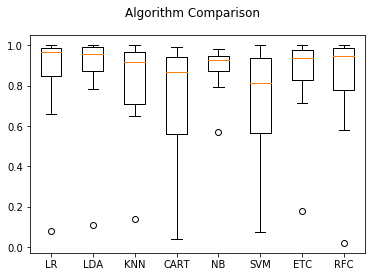

In [41]:

# prepare models and add them to a list
from matplotlib import pyplot

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RFC', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Actually this should come before. It should help in choosing the best algorithm. When you look at the results Naive Bayes gave the highest score of 0.88 and indeed it gave me the best results.

# References
#### https://machinelearningmastery.com/evaluate-performance-machine-learning-algorithms-python-using-resampling/
#### https://www.dataquest.io/blog/top-10-machine-learning-algorithms-for-beginners/
#### https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/
#### https://towardsdatascience.com/understanding-random-forest-58381e0602d2
#### https://towardsdatascience.com/ensemble-learning-in-machine-learning-getting-started-4ed85eb38e00

# '''''''''''''''''''''''''''''''END''''''''''''''''''''''''''''''